# Sommaire :
 
 **<a href="#C1"> I.) FUSIONNER LES DATASETS </a>**
  - <a href ="#C11"> A.) Phase 1</a>
  - <a href ="#C41"> B.) Phase 2</a>
  
 
 **<a href="#C2"> II.) DATA CLEANING </a>**
 
 
 **<a href="#C3"> III.) ANALYSE DES DONNEES </a>**
 - <a href ="#C31"> 3.1) Analyse Exploratoire </a>
 - <a href ="#C32"> 3.2) Analyse RFM </a>
 
 
 **<a href="#C4"> IV.) FEATURES ENGINEERING </a>**
 - <a href ="#C41"> 4.1) Transformation de la dataframe</a>
 - <a href ="#C42"> 4.2) Analyse en Composantes Principales</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

# <a name="C1"> I.) FUSIONNER LES DATASETS </a>

Nous allons fusionner en un seul jeu de données les neuf (9) datasets mis à notre possession

## <a name="C11"> A) Phase 1 <a/>

### 1.) Fusion les datasets : "products_dataset" et "product_category_name_translation"

#### .+ products_dataset

In [2]:
products = pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
# garder les colonnes utiles
products = products.loc[:,['product_id','product_category_name','product_weight_g','product_length_cm',
                        'product_height_cm', 'product_width_cm']]

#### + product_category_name_translation

In [4]:
data_category = pd.read_csv('product_category_name_translation.csv')
data_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### a.) Fusion des datasets en data_produits

In [5]:
# Filtrer les colonnes liée à la taille
caract_product = products.loc[:, ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [6]:
data_produits = pd.merge(products, data_category, on='product_category_name', how = 'left')

# Supprimer la colonne 'product_category_name'
data_produits = data_produits.drop(columns=['product_category_name'])

# Remplacer les NaN par 'Aucune'
data_produits['product_category_name_english'] = data_produits['product_category_name_english'].fillna('Aucune')

# Réorganiser les colonnes
data_produits = data_produits[['product_id','product_category_name_english','product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']]

data_produits

,product_id,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,700.0,31.0,13.0,20.0


In [7]:
data_produits.isnull().sum()

product_id                       0
product_category_name_english    0
product_weight_g                 2
product_length_cm                2
product_height_cm                2
product_width_cm                 2
dtype: int64

In [8]:
# Supprimer les ligne avec NaN
data_produits.dropna(subset=['product_weight_g','product_length_cm','product_height_cm','product_width_cm'], inplace=True)

# Réinitialiser l'index
data_produits.reset_index

data_produits.isnull().sum()

product_id                       0
product_category_name_english    0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [9]:
# Vérifier les doublons
data_produits.duplicated().sum()

0

#### b.) Catégorisation selon la taille

Nous allons réduire le nombre de catégories  à quatre (4)

In [10]:
# Filtrer les colonnes quantitative
caract_product = data_produits.loc[:, ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [11]:
from sklearn.cluster import KMeans

# Effectuer la segmentation en utilisant KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(caract_product)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
dd = {i:j for i,j in enumerate(list("abcd"))}

labels = [dd[i] for i in kmeans.labels_]

In [13]:
# Ajouter les labels de segmentation au dataframe des clients
data_produits['product_size'] = labels
data_produits.tail()

,product_id,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_size
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,12300.0,40.0,40.0,40.0,c
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,1700.0,16.0,19.0,16.0,a
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,1400.0,27.0,7.0,27.0,a
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,700.0,31.0,13.0,20.0,a
32950,106392145fca363410d287a815be6de4,bed_bath_table,2083.0,12.0,2.0,7.0,a


In [14]:
# garder les colonnes utiles
data_products = data_produits.loc[:,['product_id','product_category_name_english','product_size']]
data_products.head()

,product_id,product_category_name_english,product_size
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,a
1,3aa071139cb16b67ca9e5dea641aaa2f,art,a
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,a
3,cef67bcfe19066a932b7673e239eb23d,baby,a
4,9dc1a7de274444849c219cff195d0b71,housewares,a


In [15]:
# Afficher les segments de produits
print(data_produits.groupby('product_size').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': ['mean']
}).round(2))

             product_weight_g product_length_cm product_height_cm
                         mean              mean              mean
product_size                                                     
a                      902.85             27.89             14.34
b                    20828.33             55.91             45.47
c                     8112.05             47.67             29.97


In [16]:
# Renommer la taille des produits
data_products.loc[data_products['product_size']=='a' ,'product_size'] = 'small'
data_products.loc[data_products['product_size']=='c' ,'product_size'] = 'medium'
data_products.loc[data_products['product_size']=='b' ,'product_size'] = 'large'

data_products.sample(5)

,product_id,product_category_name_english,product_size
15802,b348cae99d8bef36e269b016bc19419b,fashion_bags_accessories,small
14350,9b2db9ec16a8a51549f32462bf973523,toys,small
393,24f9f99148480cd31288ed4e7d962e15,furniture_decor,small
19199,30674190b5af4d3b447868dff7f6ac61,housewares,medium
30629,f20a671609c09d3fb85a16e0eff0bc9d,auto,medium


#### b.) Catégorisation selon le type

In [17]:
# Grouper les produits en 10 catégories
IT_office = ['computers_accessories', 'office_furniture', 'electronics', 'telephony', 'computers', 'stationery', 
             'books_general_interest', 'fixed_telephony', 'books_technical', 'market_place', 'tablets_printing_image', 
             'books_imported', 'security_and_services']

Toy_Children_Babies = ['baby','toys','consoles_games', 'christmas_supplies', 'fashion_childrens_clothes']

Home_Cooking = ['housewares','furniture_decor','home_appliances','bed_bath_table', 'small_appliances', 'furniture_living_room',
               'air_conditioning', 'home_appliances_2','home_confort', 'audio', 'music', 'small_appliances_home_oven_and_coffee',
               'dvds_blu_ray', 'furniture_bedroom', 'home_comfort_2', 'furniture_mattress_and_upholstery', 'cds_dvds_musicals']

DIY_Garden_Pets = ['garden_tools', 'home_construction', 'construction_tools_construction', 'pet_shop', 'costruction_tools_garden']

Beauty_Health_Wellness = ['perfumery','musical_instruments','health_beauty','fashion_shoes', 'fashion_bags_accessories',
                         'watches_gifts', 'fashion_underwear_beach', 'fashion_male_clothing', 'fashio_female_clothing',
                         'arts_and_craftmanship', 'diapers_and_hygiene', 'flowers']

Glocery_Beverages_Maintenance = ['costruction_tools_tools', 'kitchen_dining_laundry_garden_furniture', 'construction_tools_lights',
                                'drinks', 'la_cuisine', 'food_drink', 'food'] 

Clothing_Shoes_Jewelry_Accessories = ['cool_stuff', 'luggage_accessories', 'party_supplies']

Sports_Leisures =['sports_leisure', 'fashion_sport']

Automotive_Industry = ['construction_tools_safety', 'auto', 'agro_industry_and_commerce', 'Aucune', 'signaling_and_security',
                      'industry_commerce_and_business']

Handmade = ['art', 'cine_photo']

Others_categories = ['cool_stuff', 'luggage_accessories', 'party_supplies', 'costruction_tools_tools','art', 'cine_photo', 
                     'kitchen_dining_laundry_garden_furniture', 'construction_tools_lights',]


In [18]:
# Renommer la taille des produits
data_products.loc[data_products['product_category_name_english'].isin(IT_office) ,'product_category'] = 'IT_office'

data_products.loc[data_products['product_category_name_english'].isin(Toy_Children_Babies) ,'product_category'] = 'Toy_Children_Babies'

data_products.loc[data_products['product_category_name_english'].isin(Home_Cooking) ,'product_category'] = 'Home_Cooking'

data_products.loc[data_products['product_category_name_english'].isin(DIY_Garden_Pets) ,'product_category'] = 'DIY_Garden_Pets'

data_products.loc[data_products['product_category_name_english'].isin(Beauty_Health_Wellness) ,'product_category'] = 'Beauty_Health_Wellness'

data_products.loc[data_products['product_category_name_english'].isin(Sports_Leisures) ,'product_category'] = 'Sports_Leisures'

data_products.loc[data_products['product_category_name_english'].isin(Automotive_Industry) ,'product_category'] = 'Automotive_Industry'

#data_products.loc[data_products['product_category_name_english'].isin(Handmade) ,'product_category'] = 'Handmade'

data_products.loc[data_products['product_category_name_english'].isin(Others_categories) ,'product_category'] = 'Others_categories'

In [19]:
data_products.drop(columns ='product_category_name_english', inplace= True)
data_products.head()

,product_id,product_size,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,small,Beauty_Health_Wellness
1,3aa071139cb16b67ca9e5dea641aaa2f,small,Others_categories
2,96bd76ec8810374ed1b65e291975717f,small,Sports_Leisures
3,cef67bcfe19066a932b7673e239eb23d,small,Toy_Children_Babies
4,9dc1a7de274444849c219cff195d0b71,small,Home_Cooking


In [20]:
data_products['product_category'].value_counts()

Home_Cooking              9328
Beauty_Health_Wellness    6172
IT_office                 5079
Sports_Leisures           2886
Automotive_Industry       2848
Toy_Children_Babies       2716
DIY_Garden_Pets           2185
Others_categories         1458
Name: product_category, dtype: int64

In [21]:
data_products.shape

(32949, 3)

In [22]:
data_products.isnull().sum()

product_id            0
product_size          0
product_category    277
dtype: int64

In [23]:
data_products.duplicated().sum()

0

### 2.) orders_dataset + customers_dataset

####  + orders_dataset

In [24]:
data_order = pd.read_csv('olist_orders_dataset.csv')
data_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
data_order = data_order.loc[:,['order_id','customer_id', 'order_status', 'order_approved_at', 'order_estimated_delivery_date',
                               'order_delivered_customer_date']]
data_order.head()

,order_id,customer_id,order_status,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-18 00:00:00,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-13 00:00:00,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-09-04 00:00:00,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-12-15 00:00:00,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-26 00:00:00,2018-02-16 18:17:02


In [26]:
data_order.shape

(99441, 6)

#### + customers_dataset

In [27]:
data_customers = pd.read_csv('olist_customers_dataset.csv')
data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [28]:
data_customers = data_customers.drop(columns='customer_zip_code_prefix')
data_customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [29]:
data_customers.shape

(99441, 4)

#### Fusion des datasets en data_client

In [30]:
data_client = pd.merge(data_order, data_customers, on = 'customer_id' )
data_client.head()

,order_id,customer_id,order_status,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-18 00:00:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-13 00:00:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-09-04 00:00:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-12-15 00:00:00,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-26 00:00:00,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [31]:
# Réorganiser dataframe
data_client = data_client[['order_id','customer_id','customer_unique_id','customer_state','customer_city','order_status', 
                           'order_approved_at','order_estimated_delivery_date','order_delivered_customer_date']]
data_client.head()

,order_id,customer_id,customer_unique_id,customer_state,customer_city,order_status,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,SP,sao paulo,delivered,2017-10-02 11:07:15,2017-10-18 00:00:00,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,BA,barreiras,delivered,2018-07-26 03:24:27,2018-08-13 00:00:00,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,GO,vianopolis,delivered,2018-08-08 08:55:23,2018-09-04 00:00:00,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,RN,sao goncalo do amarante,delivered,2017-11-18 19:45:59,2017-12-15 00:00:00,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,SP,santo andre,delivered,2018-02-13 22:20:29,2018-02-26 00:00:00,2018-02-16 18:17:02


In [32]:
data_client.shape

(99441, 9)

In [33]:
data_client.nunique()

order_id                         99441
customer_id                      99441
customer_unique_id               96096
customer_state                      27
customer_city                     4119
order_status                         8
order_approved_at                90733
order_estimated_delivery_date      459
order_delivered_customer_date    95664
dtype: int64

In [34]:
data_client.isnull().sum()

order_id                            0
customer_id                         0
customer_unique_id                  0
customer_state                      0
customer_city                       0
order_status                        0
order_approved_at                 160
order_estimated_delivery_date       0
order_delivered_customer_date    2965
dtype: int64

In [35]:
# Vérifier les doublons
data_client.duplicated().sum()

0

### 3.)  sellers_dataset + order_item + order_payment + order_review 

#### + sellers_dataset

In [36]:
data_sellers = pd.read_csv('olist_sellers_dataset.csv')
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [37]:
data_sellers.shape

(3095, 4)

In [38]:
data_sellers = data_sellers.drop(columns = ['seller_zip_code_prefix', 'seller_state'])
data_sellers.head()

,seller_id,seller_city
0,3442f8959a84dea7ee197c632cb2df15,campinas
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista


####  + order_item

In [39]:
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
# Supprimer les variables moins utiles
data_order_items = data_order_items.drop(columns=['shipping_limit_date','order_item_id','freight_value'])
data_order_items.head()

,order_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90


In [41]:
data_order_items.shape

(112650, 4)

In [42]:
data_order_items.nunique()

order_id      98666
product_id    32951
seller_id      3095
price          5968
dtype: int64

#### + order_payment 

In [43]:
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [44]:
# Montant total par ordre
data_order_payments = data_order_payments.groupby('order_id')['payment_value'].sum()
data_order_payments = data_order_payments.reset_index()
data_order_payments.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [45]:
data_order_payments.shape

(99440, 2)

#### order_review

In [46]:
data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [47]:
# Garder les colonnes nécessaires
data_order_reviews = data_order_reviews.loc[:,['order_id','review_score']]
data_order_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [48]:
data_order_reviews.shape

(99224, 2)

#### Fusion des datasets en data_ordre

In [49]:
# Fusionner les data set
data_ordre = pd.merge(data_order_items, data_order_payments, on = 'order_id', how = 'left')
data_ordre = pd.merge(data_ordre, data_order_reviews, on = 'order_id', how = 'left')
data_ordre = pd.merge(data_ordre, data_sellers, on = 'seller_id', how = 'left')
data_ordre.head()

,order_id,product_id,seller_id,price,payment_value,review_score,seller_city
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,72.19,5.0,volta redonda
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,259.83,4.0,sao paulo
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,216.87,5.0,borda da mata
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,25.78,4.0,franca
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,218.04,5.0,loanda


In [50]:
data_ordre.shape

(113314, 7)

In [51]:
data_ordre.nunique()

order_id         98666
product_id       32951
seller_id         3095
price             5968
payment_value    27845
review_score         5
seller_city        611
dtype: int64

In [52]:
data_ordre.duplicated().sum()

10662

In [53]:
# Supprimer les doublons
data_ordre.drop_duplicates(inplace=True, ignore_index=True)
data_ordre.head()

,order_id,product_id,seller_id,price,payment_value,review_score,seller_city
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,72.19,5.0,volta redonda
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,259.83,4.0,sao paulo
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,216.87,5.0,borda da mata
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,25.78,4.0,franca
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,218.04,5.0,loanda


In [54]:
data_ordre.shape

(102652, 7)

In [55]:
data_ordre.nunique()

order_id         98666
product_id       32951
seller_id         3095
price             5968
payment_value    27845
review_score         5
seller_city        611
dtype: int64

In [56]:
data_ordre.duplicated().sum()

0

In [57]:
data_ordre.isnull().sum()

order_id           0
product_id         0
seller_id          0
price              0
payment_value      1
review_score     797
seller_city        0
dtype: int64

In [58]:
# Réorganiser la dataframe
data_ordre = data_ordre[['order_id', 'review_score', 'product_id', 'seller_id','seller_city','price','payment_value']]
data_ordre.head()

,order_id,review_score,product_id,seller_id,seller_city,price,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,volta redonda,58.90,72.19
1,00018f77f2f0320c557190d7a144bdd3,4.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,239.90,259.83
2,000229ec398224ef6ca0657da4fc703e,5.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,borda da mata,199.00,216.87
3,00024acbcdf0a6daa1e931b038114c75,4.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,franca,12.99,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,loanda,199.90,218.04


## <a name="C12"> B.) Phase 2 <a/>

Nous allons fusionner les trois dataframes pour obtenir une dataframe consolidée sur la commande

### 1.)  data : data_ordre + data_client

In [59]:
data = pd.merge(data_ordre, data_client, on = 'order_id', how = 'left' )
data.head()

,order_id,review_score,product_id,seller_id,seller_city,price,payment_value,customer_id,customer_unique_id,customer_state,customer_city,order_status,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,volta redonda,58.90,72.19,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,delivered,2017-09-13 09:45:35,2017-09-29 00:00:00,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,4.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,delivered,2017-04-26 11:05:13,2017-05-15 00:00:00,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,5.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,borda da mata,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,delivered,2018-01-14 14:48:30,2018-02-05 00:00:00,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,4.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,franca,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,delivered,2018-08-08 10:10:18,2018-08-20 00:00:00,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,loanda,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,delivered,2017-02-04 14:10:13,2017-03-17 00:00:00,2017-03-01 16:42:31


In [60]:
data.shape

(102652, 15)

In [61]:
data.duplicated().sum()

0

### 2.)  data final : data + data_products

In [62]:
data = pd.merge(data, data_products, on = 'product_id', how ='left' )
data.head()

,order_id,review_score,product_id,seller_id,seller_city,price,payment_value,customer_id,customer_unique_id,customer_state,customer_city,order_status,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,product_size,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,volta redonda,58.90,72.19,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,delivered,2017-09-13 09:45:35,2017-09-29 00:00:00,2017-09-20 23:43:48,small,Others_categories
1,00018f77f2f0320c557190d7a144bdd3,4.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,239.90,259.83,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,delivered,2017-04-26 11:05:13,2017-05-15 00:00:00,2017-05-12 16:04:24,large,DIY_Garden_Pets
2,000229ec398224ef6ca0657da4fc703e,5.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,borda da mata,199.00,216.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,delivered,2018-01-14 14:48:30,2018-02-05 00:00:00,2018-01-22 13:19:16,small,Home_Cooking
3,00024acbcdf0a6daa1e931b038114c75,4.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,franca,12.99,25.78,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,delivered,2018-08-08 10:10:18,2018-08-20 00:00:00,2018-08-14 13:32:39,small,Beauty_Health_Wellness
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,loanda,199.90,218.04,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,delivered,2017-02-04 14:10:13,2017-03-17 00:00:00,2017-03-01 16:42:31,small,DIY_Garden_Pets


In [63]:
data.shape

(102652, 17)

In [64]:
data.duplicated().sum()

0

In [65]:
data = data[['order_id','customer_id','customer_unique_id', 'customer_state','customer_city', 'seller_id', 'seller_city',
             'product_id','product_size', 'product_category','order_approved_at','order_estimated_delivery_date',
             'order_status','order_delivered_customer_date', 'price','payment_value', 'review_score']]
data.head()

,order_id,customer_id,customer_unique_id,customer_state,customer_city,seller_id,seller_city,product_id,product_size,product_category,order_approved_at,order_estimated_delivery_date,order_status,order_delivered_customer_date,price,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,small,Others_categories,2017-09-13 09:45:35,2017-09-29 00:00:00,delivered,2017-09-20 23:43:48,58.90,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,large,DIY_Garden_Pets,2017-04-26 11:05:13,2017-05-15 00:00:00,delivered,2017-05-12 16:04:24,239.90,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,small,Home_Cooking,2018-01-14 14:48:30,2018-02-05 00:00:00,delivered,2018-01-22 13:19:16,199.00,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,small,Beauty_Health_Wellness,2018-08-08 10:10:18,2018-08-20 00:00:00,delivered,2018-08-14 13:32:39,12.99,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,small,DIY_Garden_Pets,2017-02-04 14:10:13,2017-03-17 00:00:00,delivered,2017-03-01 16:42:31,199.90,218.04,5.0


In [66]:
data.shape

(102652, 17)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102652 entries, 0 to 102651
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102652 non-null  object 
 1   customer_id                    102652 non-null  object 
 2   customer_unique_id             102652 non-null  object 
 3   customer_state                 102652 non-null  object 
 4   customer_city                  102652 non-null  object 
 5   seller_id                      102652 non-null  object 
 6   seller_city                    102652 non-null  object 
 7   product_id                     102652 non-null  object 
 8   product_size                   102636 non-null  object 
 9   product_category               101633 non-null  object 
 10  order_approved_at              102638 non-null  object 
 11  order_estimated_delivery_date  102652 non-null  object 
 12  order_status                  

# <a name="C2">II.) DATA CLEANING <a/>

## 2.1) Les doublons

In [68]:
data.duplicated().sum()

0

Il n'existe pas de valeurs manquantes

## 2.2) Les NaN 

In [69]:
data.isnull().sum()

order_id                            0
customer_id                         0
customer_unique_id                  0
customer_state                      0
customer_city                       0
seller_id                           0
seller_city                         0
product_id                          0
product_size                       16
product_category                 1019
order_approved_at                  14
order_estimated_delivery_date       0
order_status                        0
order_delivered_customer_date    2243
price                               0
payment_value                       1
review_score                      797
dtype: int64

### a.) Suppression

#### "order_approved_at" et "payment_value"

In [70]:
# Supprimer les NaN de les colonnes "order_approved_at" et "payment_value"
data = data.dropna(subset=['order_approved_at','payment_value','product_size','product_category'])

#### "order_delivered_customer_date"

In [71]:
data['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [72]:
# affichons les commandes non-livrés
ad = data.loc[data['order_status'] != 'delivered', : ]
ad.shape

(2216, 17)

Nous constatons que cela correspond aux NaN de la variable "order_delivered_customer_date"

In [73]:
# Supprimer les NaN 
data = data.dropna(subset=['order_delivered_customer_date'])

### b.) Remplacement

#### "review_score"

Nous avons pour 797 orders aucun commentaires. Avant de remplacer 'review_score' par la moyenne; nous allons identifier les 'customer' concernés

In [74]:
count_score = data.groupby('customer_unique_id')['review_score'].count().reset_index()
count_score.columns = ['customer_unique_id', 'count_score']
count_score.loc[count_score['count_score']==0, :].shape

(600, 2)

Nous avons **603** customers qui n'ont pas fait de commentaire

In [75]:
# Remplacer les NaN de la colonne "review_score" par la moyenne
data.loc[data['review_score'].isnull(),'review_score']=data['review_score'].mean()

In [76]:
data.isnull().sum()

order_id                         0
customer_id                      0
customer_unique_id               0
customer_state                   0
customer_city                    0
seller_id                        0
seller_city                      0
product_id                       0
product_size                     0
product_category                 0
order_approved_at                0
order_estimated_delivery_date    0
order_status                     0
order_delivered_customer_date    0
price                            0
payment_value                    0
review_score                     0
dtype: int64

 ## 2.3) Renommage de colonnes

In [77]:
data.rename(columns={'customer_id':'customer', 'order_id':'order', 'product_category_name_english':'product_category_name', 'order_approved_at':'order_approved_date',
                    'order_delivered_customer_date':'order_delivered_date', 'review_score':'score'}, inplace = True)
data.head()

,order,customer,customer_unique_id,customer_state,customer_city,seller_id,seller_city,product_id,product_size,product_category,order_approved_date,order_estimated_delivery_date,order_status,order_delivered_date,price,payment_value,score
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,small,Others_categories,2017-09-13 09:45:35,2017-09-29 00:00:00,delivered,2017-09-20 23:43:48,58.90,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,large,DIY_Garden_Pets,2017-04-26 11:05:13,2017-05-15 00:00:00,delivered,2017-05-12 16:04:24,239.90,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,small,Home_Cooking,2018-01-14 14:48:30,2018-02-05 00:00:00,delivered,2018-01-22 13:19:16,199.00,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,small,Beauty_Health_Wellness,2018-08-08 10:10:18,2018-08-20 00:00:00,delivered,2018-08-14 13:32:39,12.99,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,small,DIY_Garden_Pets,2017-02-04 14:10:13,2017-03-17 00:00:00,delivered,2017-03-01 16:42:31,199.90,218.04,5.0


## 2.4) Calcul sur les colonnes dates

### a.) Opération de date

#### Séparation de la date de l'heure

In [78]:
# Diviser la colonne en utilisant le délimiteur ":"
data[['order_approved_Date', 'order_approved_hour']] = data['order_approved_date'].str.split(" ", expand=True)
data[['order_estimated_delivery_Date', 'order_estimated_delivery_hour']] = data['order_estimated_delivery_date'].str.split(" ", expand=True)
data[['order_delivered_Date', 'order_delivered_hour']] = data['order_delivered_date'].str.split(" ", expand=True)

# Supprimer la colonne d'origine
data.drop(['order_approved_date', 'order_estimated_delivery_date', 'order_estimated_delivery_hour',
          'order_delivered_date','order_delivered_hour'], axis=1, inplace=True)

data.head()

,order,customer,customer_unique_id,customer_state,customer_city,seller_id,seller_city,product_id,product_size,product_category,order_status,price,payment_value,score,order_approved_Date,order_approved_hour,order_estimated_delivery_Date,order_delivered_Date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,small,Others_categories,delivered,58.90,72.19,5.0,2017-09-13,09:45:35,2017-09-29,2017-09-20
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,large,DIY_Garden_Pets,delivered,239.90,259.83,4.0,2017-04-26,11:05:13,2017-05-15,2017-05-12
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,small,Home_Cooking,delivered,199.00,216.87,5.0,2018-01-14,14:48:30,2018-02-05,2018-01-22
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,small,Beauty_Health_Wellness,delivered,12.99,25.78,4.0,2018-08-08,10:10:18,2018-08-20,2018-08-14
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,small,DIY_Garden_Pets,delivered,199.90,218.04,5.0,2017-02-04,14:10:13,2017-03-17,2017-03-01


#### Calcul de la durée

In [79]:
# Modifier les type des colonnes de date en type datetime
data['order_approved_date'] = pd.to_datetime(data['order_approved_Date'])
data['order_delivered_date'] = pd.to_datetime(data['order_delivered_Date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_Date'])

# Calculer la durée
data['time']= data['order_delivered_date'] - data['order_approved_date']
data['delay']= data['order_delivered_date'] - data['order_estimated_delivery_date']
data.drop(columns=['order_delivered_date', 'order_approved_date','order_estimated_delivery_date'], inplace = True)

data.head()

,order,customer,customer_unique_id,customer_state,customer_city,seller_id,seller_city,product_id,product_size,product_category,order_status,price,payment_value,score,order_approved_Date,order_approved_hour,order_estimated_delivery_Date,order_delivered_Date,time,delay
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,small,Others_categories,delivered,58.90,72.19,5.0,2017-09-13,09:45:35,2017-09-29,2017-09-20,7 days,-9 days
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,large,DIY_Garden_Pets,delivered,239.90,259.83,4.0,2017-04-26,11:05:13,2017-05-15,2017-05-12,16 days,-3 days
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,small,Home_Cooking,delivered,199.00,216.87,5.0,2018-01-14,14:48:30,2018-02-05,2018-01-22,8 days,-14 days
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,small,Beauty_Health_Wellness,delivered,12.99,25.78,4.0,2018-08-08,10:10:18,2018-08-20,2018-08-14,6 days,-6 days
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,small,DIY_Garden_Pets,delivered,199.90,218.04,5.0,2017-02-04,14:10:13,2017-03-17,2017-03-01,25 days,-16 days


### b.) Transformation du format des colonnes 'time' et 'delay'

In [80]:
# Transformation du format des colonnes time et delay en format string
data['time'] = data['time'].astype(str)
data['delay'] = data['delay'].astype(str)

In [81]:
data[['Time(day)','day_time']] = data['time'].str.split(" ", expand = True)
data[['Delay(day)','day_delay']] = data['delay'].str.split(" ", expand = True)

data.drop(columns = ['day_time','day_delay', 'time', 'delay'], inplace = True)

In [82]:
data.drop(columns = ['customer','order_estimated_delivery_Date', 'order_delivered_Date'], inplace = True)

In [83]:
# Transformation du format 
data['Time(day)'] = data['Time(day)'].astype(int)
data['Delay(day)'] = data['Delay(day)'].astype(int)

data.head()

,order,customer_unique_id,customer_state,customer_city,seller_id,seller_city,product_id,product_size,product_category,order_status,price,payment_value,score,order_approved_Date,order_approved_hour,Time(day),Delay(day)
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,RJ,campos dos goytacazes,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,small,Others_categories,delivered,58.90,72.19,5.0,2017-09-13,09:45:35,7,-9
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,SP,santa fe do sul,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,large,DIY_Garden_Pets,delivered,239.90,259.83,4.0,2017-04-26,11:05:13,16,-3
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,MG,para de minas,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,small,Home_Cooking,delivered,199.00,216.87,5.0,2018-01-14,14:48:30,8,-14
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,SP,atibaia,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,small,Beauty_Health_Wellness,delivered,12.99,25.78,4.0,2018-08-08,10:10:18,6,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,SP,varzea paulista,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,small,DIY_Garden_Pets,delivered,199.90,218.04,5.0,2017-02-04,14:10:13,25,-16


## 2.5) Structure de la nouvelle dataframe

In [84]:
data.shape

(99401, 17)

In [85]:
data.nunique()

order                  95505
customer_unique_id     92444
customer_state            27
customer_city           4079
seller_id               2936
seller_city              588
product_id             31941
product_size               3
product_category           8
order_status               2
price                   5819
payment_value          27376
score                      6
order_approved_Date      608
order_approved_hour    40966
Time(day)                146
Delay(day)               197
dtype: int64

In [86]:
data.describe().round(1)

,price,payment_value,score,Time(day),Delay(day)
count,99401.0,99401.0,99401.0,99401.0,99401.0
mean,124.3,164.4,4.1,11.9,-12.0
std,188.2,221.9,1.3,9.5,10.2
min,0.8,9.6,1.0,-7.0,-147.0
25%,40.8,63.3,4.0,6.0,-17.0
50%,79.0,108.0,5.0,10.0,-13.0
75%,139.0,182.8,5.0,15.0,-7.0
max,6735.0,13664.1,5.0,208.0,188.0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99401 entries, 0 to 102651
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order                99401 non-null  object 
 1   customer_unique_id   99401 non-null  object 
 2   customer_state       99401 non-null  object 
 3   customer_city        99401 non-null  object 
 4   seller_id            99401 non-null  object 
 5   seller_city          99401 non-null  object 
 6   product_id           99401 non-null  object 
 7   product_size         99401 non-null  object 
 8   product_category     99401 non-null  object 
 9   order_status         99401 non-null  object 
 10  price                99401 non-null  float64
 11  payment_value        99401 non-null  float64
 12  score                99401 non-null  float64
 13  order_approved_Date  99401 non-null  object 
 14  order_approved_hour  99401 non-null  object 
 15  Time(day)            99401 non-null

# <a name="C3">III.) ANALYSE DES DONNES <a/>

## <a name="C31">3.1) Analyse Exploratoire <a/>

### 3.1.1) Analyse univariée

In [88]:
effectifs = data["customer_state"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["customer_state"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = (tab_grade["n"]/len(data)).round(3) # len(data) renvoie la taille de l'échantillon

tab_state= tab_grade.iloc[:5]
tab_state

,customer_state,n,f
0,SP,41698,0.419
1,RJ,12746,0.128
2,MG,11731,0.118
3,RS,5522,0.056
4,PR,5038,0.051


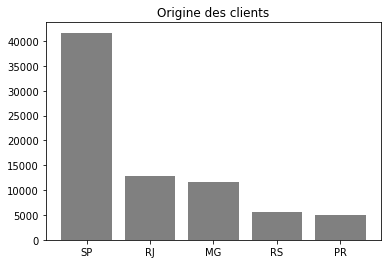

In [89]:
plt.bar(height =tab_state['n'], x = tab_state['customer_state'], color='grey')
plt.title('Origine des clients')
plt.show()

In [90]:
effectifs = data["customer_city"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["customer_city"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = (tab_grade["n"]/len(data)).round(3) # len(data) renvoie la taille de l'échantillon

tab_customer_city = tab_grade.iloc[:5]
tab_customer_city

,customer_city,n,f
0,sao paulo,15521,0.156
1,rio de janeiro,6773,0.068
2,belo horizonte,2788,0.028
3,brasilia,2147,0.022
4,curitiba,1527,0.015


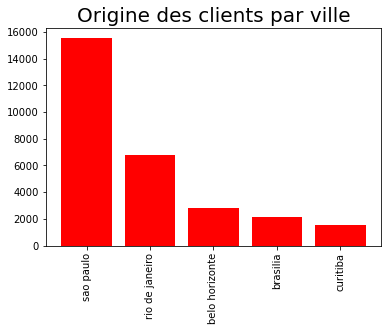

In [91]:
plt.bar(height = tab_customer_city['n'], x = tab_customer_city['customer_city'], color='red')
plt.title('Origine des clients par ville', size =20)
plt.xticks(rotation='vertical')
plt.show()

#### Var : "product_category"

In [92]:
effectifs = data["product_category"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["product_category"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = (tab_grade["n"]/len(data)).round(3) # len(data) renvoie la taille de l'échantillon

tab_product = tab_grade.iloc[:10]
tab_product

,product_category,n,f
0,Home_Cooking,25964,0.261
1,Beauty_Health_Wellness,20854,0.210
2,IT_office,18654,0.188
3,Toy_Children_Babies,7928,0.080
4,Sports_Leisures,7703,0.077
5,DIY_Garden_Pets,6767,0.068
6,Automotive_Industry,6030,0.061
7,Others_categories,5501,0.055


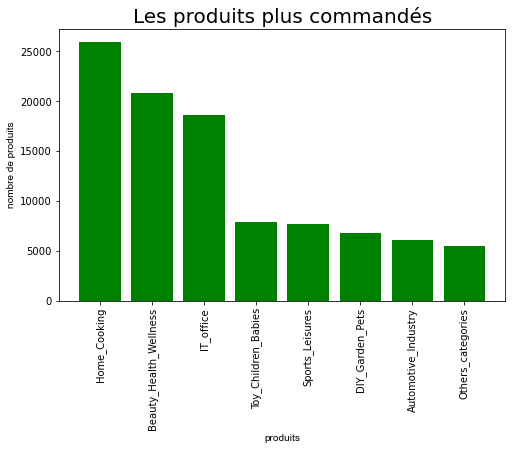

In [93]:
plt.figure(figsize=(8,5)) # la taille de fenêtre graphique
plt.bar(height = tab_product['n'], x = tab_product["product_category"], color='green')
plt.title('Les produits plus commandés', size =20)
plt.xlabel('produits', fontname='Arial', fontsize=10)
plt.ylabel('nombre de produits', fontname='Arial', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

Dix**(10)** représentent plus de 60% des commandes

#### Var : 	"order_status"

In [94]:
effectifs = data["order_status"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["order_status"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = (tab_grade["n"]/len(data)).round(3) # len(data) renvoie la taille de l'échantillon

tab_grade 

,order_status,n,f
0,delivered,99394,1.0
1,canceled,7,0.0


Ayant, une valeur unique, nous pouvons supprimer cette variable 

#### Var : ''payment_value"

In [95]:
data['payment_value'].mean()

164.37729922233171

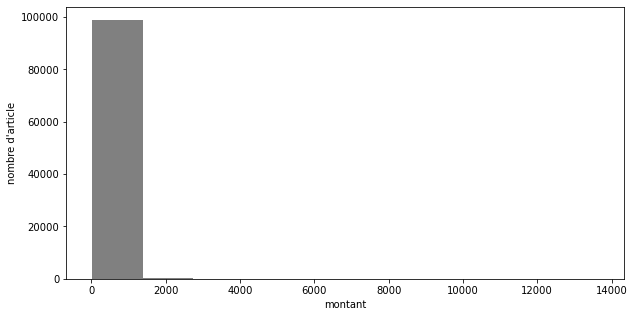

In [96]:
plt.figure(figsize=(10,5))
plt.hist(data['payment_value'], color='grey')
plt.xlabel('montant')
plt.ylabel("nombre d'article")
plt.show()

#### Var : ''score"

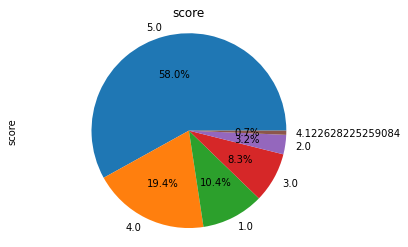

In [97]:
data["score"].value_counts(normalize=True).plot(kind='pie',autopct="%1.1f%%")
plt.axis('equal')
plt.title("score")
plt.show()

Le taux de satisfaction est élevé

#### Var : ''Time(day)"

In [98]:
data['Time(day)'].mean()

11.948179595778715

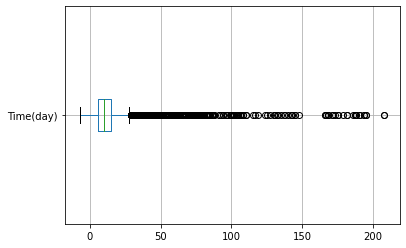

In [99]:
data.boxplot(column="Time(day)", vert=False)
plt.show()

Pour plus de lisibilité, nous allons scinder en deux(2) sur 'Time(day)'= 30

In [100]:
data1 = data.loc[data['Time(day)'] <= 60, :]
data2 = data.loc[data['Time(day)'] > 60, :]

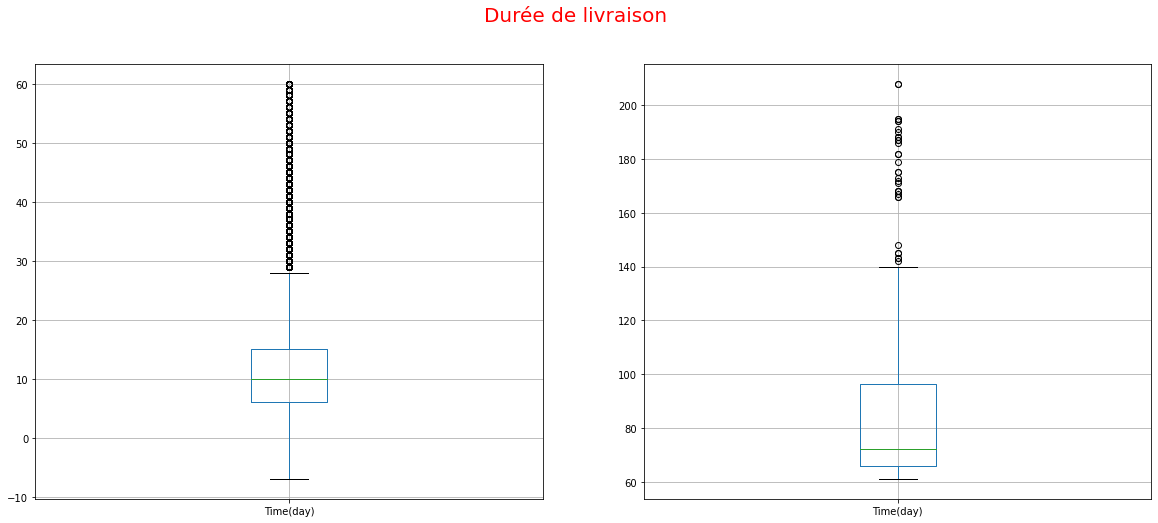

In [101]:
# Propriété du graphe 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

data1.boxplot(column="Time(day)", vert=True , ax=axes[0])
data2.boxplot(column="Time(day)", vert=True , ax=axes[1])
plt.suptitle("Durée de livraison", fontsize = 20, color = 'red')
plt.show()

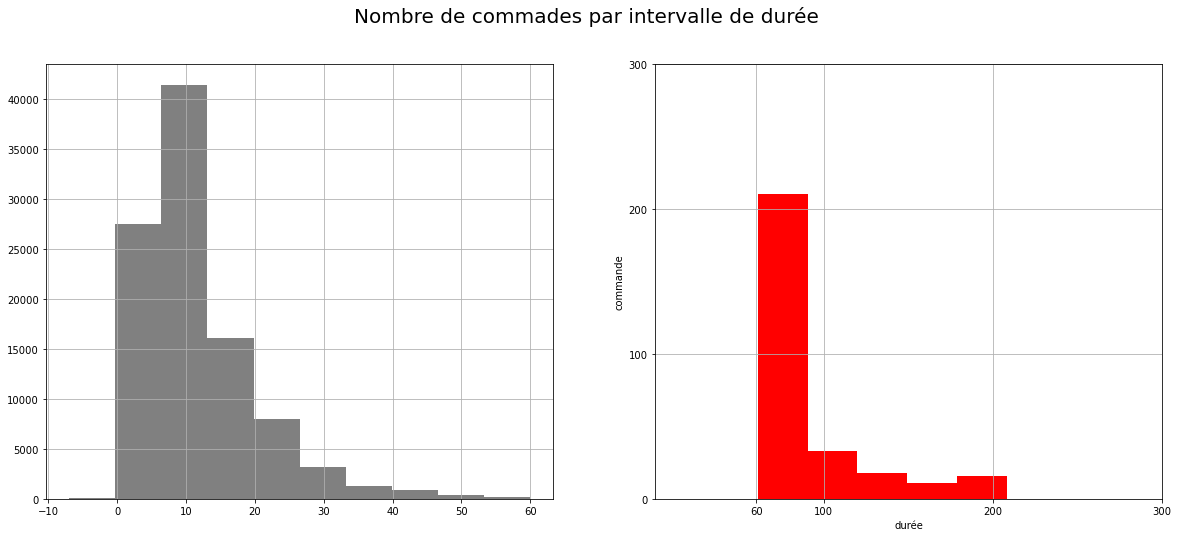

In [102]:
# Propriété du graphe 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

data1['Time(day)'].hist(color='grey', ax=axes[0])
data2['Time(day)'].hist(color='red', bins=5, ax=axes[1])
plt.xlim(0,300)
plt.xticks([60,100, 200, 300])
plt.ylim(0,300)
plt.yticks([0, 100, 200, 300])

plt.xlabel("durée")
plt.ylabel("commande")

plt.suptitle("Nombre de commades par intervalle de durée", size=20)
plt.show()

La majorité des commandés ont été livrée avant vingt(20) jours

### 3.1.2) Analyse bivariée de variables quantitatives

#### a.) Analyse bivariée de variables quantitatives

####  + Var : ''customer_city" et "Time(day)"

Nous constatons la même attitude de dépense pour les 5 villes importances 

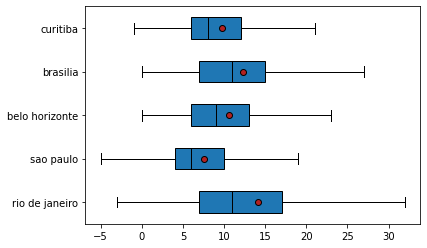

In [103]:
data1 = data.loc[data["customer_city"].isin(['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia','curitiba']), :]

X = 'customer_city' # qualitative
Y = 'Time(day)' # quantitative

modalites = data1[X].unique()
groupes = []
for m in modalites:
    groupes.append(data1[data1[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
#plt.figure(figsize=(20,5))
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

La durée de livraison est relativement long pour la ville de **'rio de janeiro'**

#### Carte à chaleur

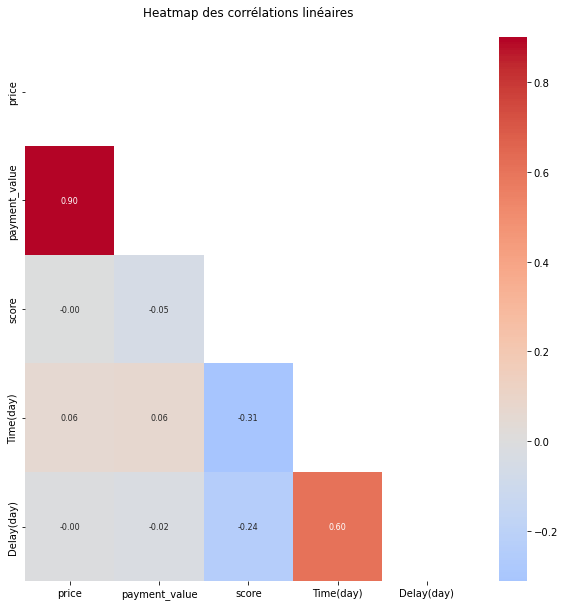

In [104]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")

plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

Il y'a une forte corrélation entre les variables **'price'** et **'payment_value'** 

#### b.) Analyse bivariée de variables qualitatives

#### Var : customer_state et product_category

#### Tableau de contingence

In [105]:
# transformation des  dataframes de états et produits en listes
customer_state = data.loc[data['customer_state'].isin(tab_state['customer_state'].tolist()), 'customer_state']
product_category = data.loc[data['product_category'].isin(tab_product['product_category'].tolist()), 'product_category']

In [106]:
from scipy.stats import chi2_contingency

# Calculer le tableau de contingence
contingency_table = pd.crosstab(customer_state, product_category)

# Afficher le tableau de contingence
contingency_table

product_category,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,Home_Cooking,IT_office,Others_categories,Sports_Leisures,Toy_Children_Babies
customer_state,,,,,,,,
MG,705,2417,915,3009,2155,714,865,951
PR,315,981,331,1300,989,297,426,399
RJ,683,2523,928,3613,2344,713,914,1028
RS,309,905,400,1560,1102,365,419,462
SP,2523,8676,2696,11787,7312,2121,3302,3281


#### Test de CHI-carré

- **Le degré de liberté** : détermine le nombre de valeurs qui peuvent varier de manière indépendante dans une distribution de données. Un plus grand degré de liberté indique une plus grande variabilité dans les données.

- **p-valeur** : détermine si les résultats d'une étude sont statistiquement significatifs ou non. Une p-valeur faible (généralement inférieure à 0,05) est considérée comme indiquant une forte probabilité que les résultats de l'étude ne soient pasdus au hasard

In [107]:
#Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print('Le résultat du test du chi-carré est :')
print('p-valeur :', p)
print('degrés de liberté :', dof)
print('tableau de contingence attendu :')

Cont = pd.DataFrame(expected, index= tab_state['customer_state'].tolist() ,columns= tab_product['product_category'].tolist())
Cont

Le résultat du test du chi-carré est :
p-valeur : 3.306391449400742e-27
degrés de liberté : 28
tableau de contingence attendu :


,Home_Cooking,Beauty_Health_Wellness,IT_office,Toy_Children_Babies,Sports_Leisures,DIY_Garden_Pets,Automotive_Industry,Others_categories
SP,693.296214,2369.895901,805.660650,3251.536313,2125.293048,643.611260,905.947820,935.758793
RJ,297.743272,1017.776451,345.999348,1396.406099,912.729211,276.405552,389.068717,401.871349
MG,753.282205,2574.946139,875.368737,3532.868626,2309.179540,699.298365,984.333042,1016.723347
RS,326.347429,1115.554102,379.239460,1530.558650,1000.414987,302.959797,426.446498,440.479077
PR,2464.330879,8423.827406,2863.731804,11557.630312,7554.383215,2287.725028,3220.203923,3326.167433


Nous avons un P-valeur inférieur  à 0.05 donc les variables sont corrélés

#### Var : customer_state et customer_city

In [108]:
# transformation des  dataframes de états et produits en listes
customer_state = data.loc[data['customer_state'].isin(tab_state['customer_state'].tolist()), 'customer_state']
customer_city = data.loc[data['customer_city'].isin(tab_customer_city['customer_city'].tolist()), 'customer_city']

# Calculer le tableau de contingence
contingency_table = pd.crosstab(customer_state, customer_city)
contingency_table

customer_city,belo horizonte,curitiba,rio de janeiro,sao paulo
customer_state,,,,
MG,2788,0,0,0
PR,0,1527,0,0
RJ,0,0,6773,0
SP,0,0,0,15521


In [109]:
#Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print('Le résultat du test du chi-carré est :')
print('p-valeur :', p)
print('degrés de liberté :', dof)

Le résultat du test du chi-carré est :
p-valeur : 0.0
degrés de liberté : 9


Nous avons un P-valeur inférieur  à 0.05 donc les variables sont corrélés

A la suite de ces différentes analyses, nous pouvons supprimer sans conséquences majeures pour la modélisation les variables **'customer_city'** et **'product_category_name'**

Toutefois nous allons conserver la variable **'product_category'**

In [110]:
data.drop(columns = ['price','customer_city','seller_city'], inplace=True)

In [111]:
data.shape

(99401, 14)

In [112]:
data.duplicated().sum()

0

## <a name="C32">3.2) Analyse RFM <a/>
#### a) La table **RFM**

In [113]:
# Calcul de la date maximale de commande pour chaque client
recency_df = data.groupby('customer_unique_id')['order_approved_Date'].max().reset_index()
recency_df.columns = ['customer_unique_id', 'last_order_date'] # changement de nom des colonnes

In [114]:
# Calcul du nombre de commandes pour chaque client
frequency_df = data.groupby('customer_unique_id')['order_approved_Date'].count().reset_index()
frequency_df.columns = ['customer_unique_id', 'order_count']

In [115]:
# Calcul du montant total dépensé pour chaque client
monetary_df = data.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.columns = ['customer_unique_id', 'total_spent']

In [116]:
# Fusion des DataFrames pour obtenir la table RFM
rfm_table = recency_df.merge(frequency_df, on='customer_unique_id').merge(monetary_df, on='customer_unique_id')
rfm_table.sample(7)

,customer_unique_id,last_order_date,order_count,total_spent
48534,865beeccce9e5e942d09075165302d8d,2017-11-28,1,25.78
55805,9a826a56844c1a5c011ad576e43f359a,2017-10-05,1,70.72
81197,e097c4114ede8b9d67f6e02d39f1319b,2017-05-11,1,36.34
39670,6d8cb81516d38c3f02c0ab80c6a9277b,2018-01-28,1,108.91
10780,1d8d9bd8722aa47e7cf452dc592685fb,2018-06-07,1,135.96
71305,c53efd7066418285996351ab44147126,2017-12-20,1,121.09
89470,f7a4e3a119ca95171fb62bde4a271c03,2017-12-13,1,200.91


#### b) Calcul des scores

In [117]:
# Modifier les type des colonnes de date en type datetime
rfm_table['last_order_date'] = pd.to_datetime(rfm_table['last_order_date'])

In [118]:
# Calcul de la valeur R (Recency)
max_date = rfm_table['last_order_date'].max()
rfm_table['recency'] = (max_date - rfm_table['last_order_date']).dt.days

In [119]:
# Calcul de la valeur F (Frequency)
max_order_count = rfm_table['order_count'].max()
rfm_table['frequency'] = rfm_table['order_count'] / max_order_count

In [120]:
# Calcul de la valeur M (Monetary)
max_total_spent = rfm_table['total_spent'].max()
rfm_table['monetary'] = rfm_table['total_spent'] / max_total_spent

In [121]:
# Affichage des résultats
rfm_table.sample(10)

,customer_unique_id,last_order_date,order_count,total_spent,recency,frequency,monetary
56647,9cc5367471d83a17c41eeb85c0075372,2017-09-23,1,128.02,340,0.066667,0.008012
50215,8b2b7333feeb6246c6bd5834dd94303d,2018-03-03,1,343.16,179,0.066667,0.021476
16741,2e240821e6a4ec76c51e350c00aa3d1a,2017-04-10,1,261.96,506,0.066667,0.016394
14103,26ee6866e32b3a70b86545f99bcafe8f,2018-06-16,1,373.37,74,0.066667,0.023367
18791,33d548bd0d29692e9dc471cdf65c441d,2018-03-08,1,144.10,174,0.066667,0.009018
60412,a70166e178a7cb30b696bc74c76715c8,2017-08-11,1,29.10,383,0.066667,0.001821
8739,17f2fb688db56f722a0d628586df05a5,2018-03-13,1,345.15,169,0.066667,0.021601
89845,f8b64b7a8f8a737674be2f0f73467d7c,2017-03-22,1,217.72,525,0.066667,0.013626
3930,0aacde7f3bda1ae91da7289dcb1c2a5c,2018-08-03,1,235.06,26,0.066667,0.014711
85070,eb4e9594ff7f92379d4109c4e2976f93,2018-03-16,1,178.59,166,0.066667,0.011177


In [122]:
# Trie suivant les ordres suivant : récent, fréquent et valeur élevée
rfm_table.sort_values(['recency','frequency', 'monetary'], ascending=[True, False, False]).sample(10)

,customer_unique_id,last_order_date,order_count,total_spent,recency,frequency,monetary
57493,9f10ed5e6157a32cce16e0b22013096b,2017-07-04,1,71.14,421,0.066667,0.004452
33904,5d869784b798f67d1cb6d438e433ccdb,2018-06-05,1,62.23,85,0.066667,0.003895
61402,a9e15fa88ea3281c6a02637482d74f42,2018-05-14,1,161.86,107,0.066667,0.010130
1246,0366651462307b0703818560d1472f9d,2018-06-24,1,788.53,66,0.066667,0.049349
30151,5350f3081eb4ebe206765f8f56fa26ce,2018-05-28,1,309.63,93,0.066667,0.019378
91324,fcecfb187df6e865659cfdc0620b06af,2018-02-16,1,192.98,194,0.066667,0.012077
71005,c475c43c3e325793dcdf5473b094aa38,2018-03-25,1,64.22,157,0.066667,0.004019
61941,ab487f6d62e9a0cfcdbe428b4d4d571a,2018-02-21,1,89.88,189,0.066667,0.005625
36874,65c8d5626ef56c53ff0336e24c7a9bd9,2018-05-23,1,276.26,98,0.066667,0.017289
43351,77ecab2eb1a52c819356d9f53739a8ac,2017-05-22,1,242.80,464,0.066667,0.015195


#### c) Catégorisation

In [123]:
# Calcul des score
rfm_score = rfm_table.loc[:, ['recency', 'frequency', 'monetary']]

In [124]:
# Normaliser les scores RFM
rfm_norm = (rfm_score - rfm_score.mean()) / rfm_score.std()

In [125]:
from sklearn.cluster import KMeans

# Effectuer la segmentation en utilisant KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(rfm_norm)
labels = kmeans.labels_

In [126]:
# Ajouter les labels de segmentation au dataframe des clients
rfm_table['category'] = labels
rfm_table.head()

,customer_unique_id,last_order_date,order_count,total_spent,recency,frequency,monetary,category
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,111,0.066667,0.008881,6
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,114,0.066667,0.001702,6
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,537,0.066667,0.005396,8
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,321,0.066667,0.002730,2
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,288,0.066667,0.012322,2


In [127]:
rfm_table.shape

(92444, 8)

In [128]:
# Afficher les segments de clientèle
print(rfm_table.groupby('category').agg({
    'recency': ['min', 'max'],
    'frequency':['min', 'max'],
    'monetary': ['min','max','count']
}).round(3))

         recency      frequency        monetary              
             min  max       min    max      min    max  count
category                                                     
0            121  249     0.067  0.067    0.001  0.027  23790
1              0  693     0.133  0.133    0.002  0.077   4585
2            249  400     0.067  0.067    0.001  0.030  21549
3              1  692     0.067  0.067    0.025  0.082   3561
4              5  692     0.267  1.000    0.007  0.255    113
5             17  563     0.067  0.533    0.235  1.000     34
6              0  127     0.067  0.067    0.001  0.033  22472
7              0  693     0.200  0.267    0.003  0.124    752
8            396  694     0.067  0.067    0.001  0.051  14902
9              3  690     0.067  0.200    0.077  0.263    686


# <a name="C4">IV.) FEATURES ENGINEERING <a/>

Nous allons créer une dataframe consolider sur les clients

### Ajout de colonnes

In [129]:
data = data.drop(['order_approved_hour','Time(day)','Delay(day)'], axis=1)
data.head()

,order,customer_unique_id,customer_state,seller_id,product_id,product_size,product_category,order_status,payment_value,score,order_approved_Date
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,RJ,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,small,Others_categories,delivered,72.19,5.0,2017-09-13
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,SP,dd7ddc04e1b6c2c614352b383efe2d36,e5f2d52b802189ee658865ca93d83a8f,large,DIY_Garden_Pets,delivered,259.83,4.0,2017-04-26
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,MG,5b51032eddd242adc84c38acab88f23d,c777355d18b72b67abbeef9df44fd0fd,small,Home_Cooking,delivered,216.87,5.0,2018-01-14
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,SP,9d7a1d34a5052409006425275ba1c2b4,7634da152a4610f1595efa32f14722fc,small,Beauty_Health_Wellness,delivered,25.78,4.0,2018-08-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,SP,df560393f3a51e74553ab94004ba5c87,ac6c3623068f30de03045865e4e10089,small,DIY_Garden_Pets,delivered,218.04,5.0,2017-02-04


In [130]:
data.shape

(99401, 11)

In [131]:
data['product_category'].value_counts()

Home_Cooking              25964
Beauty_Health_Wellness    20854
IT_office                 18654
Toy_Children_Babies        7928
Sports_Leisures            7703
DIY_Garden_Pets            6767
Automotive_Industry        6030
Others_categories          5501
Name: product_category, dtype: int64

#### Importer le fichier

In [132]:
data.to_csv(".\data_Order",index=False)

## <a name="C41"> 4.1) Transformation de la dataframe <a/>

### a.) nv1

In [133]:
# Calcul de la moyenne de satisfaction pour chaque client
average_score = data.groupby('customer_unique_id')['score'].mean().reset_index()
average_score.columns = ['customer_unique_id', 'average_score']

In [134]:
# Fusion des DataFrames pour obtenir la table RFM
nv1 = average_score.merge(count_score,on='customer_unique_id')
nv1.head()

,customer_unique_id,average_score,count_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1
2,0000f46a3911fa3c0805444483337064,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,1


### b.) nv2

In [135]:
state = data.loc[:, ['customer_unique_id','customer_state']]
# supprimer les doublons
state.drop_duplicates('customer_unique_id', inplace=True, ignore_index=True)

In [136]:
nv =  state.merge(rfm_table, on='customer_unique_id')
nv2 = nv.drop(['last_order_date', 'recency','frequency', 'monetary' ,'category'],axis=1)
nv2.head()

,customer_unique_id,customer_state,order_count,total_spent
0,871766c5855e863f6eccc05f988b23cb,RJ,1,72.19
1,eb28e67c4c0b83846050ddfb8a35d051,SP,2,284.56
2,3818d81c6709e39d06b2738a8d3a2474,MG,1,216.87
3,af861d436cfc08b2c2ddefd0ba074622,SP,1,25.78
4,64b576fb70d441e8f1b2d7d446e483c5,SP,1,218.04


### c.) nv3

In [137]:
# Pivoter les valeur de catégorie en colonnes
prod=data.pivot_table(index='customer_unique_id',columns='product_category', values='order_status', aggfunc='count')
prod_cat = prod.reset_index()

# Remplacer les valeurs NaN par 0
prod_cat = prod_cat.fillna(0)

In [138]:
# Pivoter les valeur de taille en colonnes
prod=data.pivot_table(index='customer_unique_id',columns='product_size', values='order_status', aggfunc='count')
prod_size = prod.reset_index()

# Remplacer les valeurs NaN par 0
prod_size[['small', 'large', 'medium']] = prod_size[['small', 'large', 'medium']].fillna(0)

In [139]:
nv3 = pd.merge(prod_size,prod_cat, on = 'customer_unique_id')
nv3.head()

,customer_unique_id,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,Home_Cooking,IT_office,Others_categories,Sports_Leisures,Toy_Children_Babies
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Fusion

In [140]:
data = nv2.merge(nv1, on = 'customer_unique_id').merge(nv3, on = 'customer_unique_id')
data.head()

,customer_unique_id,customer_state,order_count,total_spent,average_score,count_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,Home_Cooking,IT_office,Others_categories,Sports_Leisures,Toy_Children_Babies
0,871766c5855e863f6eccc05f988b23cb,RJ,1,72.19,5.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,eb28e67c4c0b83846050ddfb8a35d051,SP,2,284.56,4.5,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3818d81c6709e39d06b2738a8d3a2474,MG,1,216.87,5.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,af861d436cfc08b2c2ddefd0ba074622,SP,1,25.78,4.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64b576fb70d441e8f1b2d7d446e483c5,SP,1,218.04,5.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [141]:
data = data.drop('count_score', axis=1)
data.head()

,customer_unique_id,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,Home_Cooking,IT_office,Others_categories,Sports_Leisures,Toy_Children_Babies
0,871766c5855e863f6eccc05f988b23cb,RJ,1,72.19,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,eb28e67c4c0b83846050ddfb8a35d051,SP,2,284.56,4.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3818d81c6709e39d06b2738a8d3a2474,MG,1,216.87,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,af861d436cfc08b2c2ddefd0ba074622,SP,1,25.78,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64b576fb70d441e8f1b2d7d446e483c5,SP,1,218.04,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [142]:
data.shape

(92444, 16)

In [143]:
data.columns

Index(['customer_unique_id', 'customer_state', 'order_count', 'total_spent',
       'average_score', 'large', 'medium', 'small', 'Automotive_Industry',
       'Beauty_Health_Wellness', 'DIY_Garden_Pets', 'Home_Cooking',
       'IT_office', 'Others_categories', 'Sports_Leisures',
       'Toy_Children_Babies'],
      dtype='object')

#### Exporter le fichier 

In [144]:
data.to_csv(".\DATA.csv",index=False)

## <a name="C42">4.2.) Analyse en Composantes Principales <a/>

In [145]:
data.describe(include='all').round(2)

,customer_unique_id,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,Home_Cooking,IT_office,Others_categories,Sports_Leisures,Toy_Children_Babies
count,92444,92444,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00
unique,92444,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,871766c5855e863f6eccc05f988b23cb,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,38652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.08,176.75,4.15,0.02,0.12,0.93,0.07,0.23,0.07,0.28,0.20,0.06,0.08,0.09
std,NaN,NaN,0.34,266.81,1.28,0.16,0.33,0.48,0.26,0.45,0.28,0.52,0.42,0.24,0.29,0.29
min,NaN,NaN,1.00,9.59,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,1.00,63.36,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,NaN,1.00,109.80,5.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,NaN,NaN,1.00,188.78,5.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


### 4.2.1) Standardisation : Centrer et réduire les données 

In [146]:
# Supprimer la colonnes non numérique
X = data.drop(['customer_state','customer_unique_id'], axis=1)

In [147]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# On le transforme en DataFrame : 
X_scaled = pd.DataFrame(X_scaled)

X_scaled.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00,92444.00
mean,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.22,-0.63,-2.47,-0.15,-0.35,-1.96,-0.26,-0.50,-0.26,-0.54,-0.48,-0.25,-0.28,-0.29
25%,-0.22,-0.42,-0.12,-0.15,-0.35,0.14,-0.26,-0.50,-0.26,-0.54,-0.48,-0.25,-0.28,-0.29
50%,-0.22,-0.25,0.66,-0.15,-0.35,0.14,-0.26,-0.50,-0.26,-0.54,-0.48,-0.25,-0.28,-0.29
75%,-0.22,0.05,0.66,-0.15,-0.35,0.14,-0.26,-0.50,-0.26,1.39,-0.48,-0.25,-0.28,-0.29
max,40.76,59.22,0.66,31.65,14.73,29.44,23.21,12.85,28.63,20.65,16.04,12.24,33.89,20.20


### 4.2.2) Pourcentage de variance expliquée

In [148]:
from sklearn.decomposition import PCA
from sklearn import decomposition

pca = PCA()
pca.fit(X_scaled)

# Calculer la variance et le taux de variance
pca.explained_variance_
pca.explained_variance_ratio_

array([1.46610219e-01, 1.16748105e-01, 8.84373982e-02, 8.56240822e-02,
       7.94511919e-02, 7.84940052e-02, 7.71081400e-02, 7.57774856e-02,
       7.36880152e-02, 6.97665888e-02, 6.82911249e-02, 4.00036435e-02,
       7.32866975e-30, 3.50378420e-33])

In [149]:
# mettre sous forme da dataframe
var_expl = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(a + 1) for a in range(14)], 
        "Variance expliquée" : pca.explained_variance_,
        "variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
var_expl

,Dimension,Variance expliquée,variance expliquée,cum. var. expliquée
0,Dim1,2.052565e+00,15.0,15.0
1,Dim2,1.634491e+00,12.0,26.0
2,Dim3,1.238137e+00,9.0,35.0
3,Dim4,1.198750e+00,9.0,44.0
4,Dim5,1.112329e+00,8.0,52.0
5,Dim6,1.098928e+00,8.0,60.0
6,Dim7,1.079526e+00,8.0,67.0
7,Dim8,1.060896e+00,8.0,75.0
8,Dim9,1.031643e+00,7.0,82.0
9,Dim10,9.767428e-01,7.0,89.0


### 4.2.3) PCA : Réduction du nombre de variable

In [150]:
# Créer une instance de l'objet PCA avec le nombre de composantes principales 

components =8
pca = PCA(n_components=components)

# Transformer les données en utilisant la méthode "fit_transform()" de l'objet PCA:
pca_data = pca.fit_transform(X_scaled)

In [151]:
df_pca = pd.DataFrame(data=pca_data, columns=['PC{}'.format(i) for i in range(1, components +1 ) ])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.453173,-0.475505,0.908050,-0.198068,1.982270,-1.692184,-0.218758,-0.570270
1,0.563502,3.187697,2.066192,3.404257,1.274128,0.622491,-0.392839,-2.069185
2,0.318968,0.335463,-0.733735,-0.975728,0.005529,-0.745319,-0.194401,-0.192341
3,0.373827,-1.228459,1.049602,-0.339624,-0.995308,-0.327800,-0.064375,-0.065938
4,-0.167254,0.000962,0.349539,-0.149792,-0.201059,1.940684,-0.518369,-2.227760


In [152]:
df_pca.shape

(92444, 8)

In [153]:
data = data.iloc[:, :1]

# Ajouter les colonnes de la df_pca à la data
cols = df_pca.columns
for col in cols:
    data[col] = df_pca[col]
    
data.head()

,customer_unique_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,871766c5855e863f6eccc05f988b23cb,-0.453173,-0.475505,0.908050,-0.198068,1.982270,-1.692184,-0.218758,-0.570270
1,eb28e67c4c0b83846050ddfb8a35d051,0.563502,3.187697,2.066192,3.404257,1.274128,0.622491,-0.392839,-2.069185
2,3818d81c6709e39d06b2738a8d3a2474,0.318968,0.335463,-0.733735,-0.975728,0.005529,-0.745319,-0.194401,-0.192341
3,af861d436cfc08b2c2ddefd0ba074622,0.373827,-1.228459,1.049602,-0.339624,-0.995308,-0.327800,-0.064375,-0.065938
4,64b576fb70d441e8f1b2d7d446e483c5,-0.167254,0.000962,0.349539,-0.149792,-0.201059,1.940684,-0.518369,-2.227760


### Export csv

In [154]:
# Exporter le fichier après PCA
data.to_csv(".\data",index=False)